In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [76]:
df_unlabeled=pd.read_csv('vehicle_claims.csv')
df_unlabeled.head()

,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,...,Seat_num,Door_num,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date
0,Bentley,Arnage,10_1,2018,4,Silver,2000.0,Saloon,60000,6.8L,...,5.0,4.0,Electrical Issue,4,12,2018-04-12,3,184.5000,6.0,2018-04-13
1,Bentley,Arnage,10_1,2018,6,Grey,2002.0,Saloon,44000,6.8L,...,5.0,4.0,Brake Pads Worn,0,10,2018-06-10,3,134.3750,6.0,2018-06-11
2,Bentley,Arnage,10_1,2017,11,Blue,2002.0,Saloon,55000,6.8L,...,5.0,4.0,Flat Tyres,0,2,2017-11-02,3,68.9997,3.0,2017-11-02
3,Bentley,Arnage,10_1,2018,4,Green,2003.0,Saloon,14000,6.8L,...,5.0,4.0,Gear Box Issue,0,27,2018-04-27,3,469.4800,6.0,2018-04-28
4,Bentley,Arnage,10_1,2017,11,Grey,2003.0,Saloon,61652,6.8L,...,5.0,4.0,Electrical Issue,4,23,2017-11-23,3,199.6650,6.0,2017-11-24


In [77]:
df_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Maker              268255 non-null  object 
 1    Genmodel          268255 non-null  object 
 2    Genmodel_ID       268255 non-null  object 
 3   Adv_year           268255 non-null  int64  
 4   Adv_month          268255 non-null  int64  
 5   Color              268255 non-null  object 
 6   Reg_year           268255 non-null  float64
 7   Bodytype           268255 non-null  object 
 8   Runned_Miles       268255 non-null  object 
 9   Engin_size         268255 non-null  object 
 10  Gearbox            268255 non-null  object 
 11  Fuel_type          268255 non-null  object 
 12  Price              268255 non-null  float64
 13  Seat_num           268255 non-null  float64
 14  Door_num           268255 non-null  float64
 15  issue              268255 non-null  object 
 16  is

In [78]:
df_labeled=pd.read_csv('vehicle_claims_labeled.csv')
df_labeled.head()

,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,...,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,Label,category_anomaly,repair_date
0,Bentley,Arnage,10_1,2018,4,Silver,2000.0,Saloon,60000,6.8L,...,Starter Motor Issue,0,19,2018-04-19,3,395.000,9.0,0,0,2018-04-21
1,Bentley,Arnage,10_1,2018,6,Grey,2002.0,Saloon,44000,6.8L,...,Radiator Leaking,0,15,2018-06-15,3,695.000,6.0,0,0,2018-06-16
2,Bentley,Arnage,10_1,2017,11,Blue,2002.0,Saloon,55000,6.8L,...,Steering Wheel Shaking,0,10,2017-11-10,3,89.999,3.0,0,0,2017-11-10
3,Bentley,Arnage,10_1,2018,4,Green,2003.0,Saloon,14000,6.8L,...,Electrical Issue,4,14,2018-04-14,3,224.844,6.0,0,0,2018-04-15
4,Bentley,Arnage,10_1,2017,11,Grey,2003.0,Saloon,61652,6.8L,...,Windscreen Crack,0,6,2017-11-06,3,75.933,3.0,0,0,2017-11-06


In [81]:
df_labeled[['Label','category_anomaly']].value_counts(normalize=True)

Label  category_anomaly
0      0                   0.788451
1      0                   0.118473
       1                   0.093076
dtype: float64

In [82]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Maker              268255 non-null  object 
 1    Genmodel          268255 non-null  object 
 2    Genmodel_ID       268255 non-null  object 
 3   Adv_year           268255 non-null  int64  
 4   Adv_month          268255 non-null  int64  
 5   Color              268255 non-null  object 
 6   Reg_year           268255 non-null  float64
 7   Bodytype           268255 non-null  object 
 8   Runned_Miles       268255 non-null  int64  
 9   Engin_size         268255 non-null  object 
 10  Gearbox            268255 non-null  object 
 11  Fuel_type          268255 non-null  object 
 12  Price              268255 non-null  float64
 13  Seat_num           268255 non-null  float64
 14  Door_num           268255 non-null  float64
 15  issue              268255 non-null  object 
 16  is

In [83]:
set(df_labeled.columns).difference(df_unlabeled.columns)

{'Label', 'category_anomaly'}

In [84]:
df_labeled.columns

Index(['Maker', ' Genmodel', ' Genmodel_ID', 'Adv_year', 'Adv_month', 'Color',
       'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size', 'Gearbox',
       'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue', 'issue_id',
       'Adv_day', 'breakdown_date', 'repair_complexity', 'repair_cost',
       'repair_hours', 'Label', 'category_anomaly', 'repair_date'],
      dtype='object')

In [85]:
# cat='Categórico'
# disc='Num Discreto'
# date='Data'
# cont='Num contínuo'
# car={'Marca do Carro':cat,'Nome do Carro':cat,'Versão do Carro':cat,'Cor':cat,'Ano do Carro':disc,
#  'Qtd de Assentos':disc,'Qtd de Portas':disc,'Tipo de Carro':cat,'Tipo de Motor':cat,
#  'Capacidade do Motor':disc,'Tipo de Combustível':cat,'Kilometragem':disc,'Preço':cont}
# ## 6 cat, 5 disc, 1 cont

# repair={'Complexidade do Reparo':cat,'Data do Reparo':date,'Tempo de Reparo':cont,
#         'Data do Sinistro':date,'Ano do Aviso':disc,'Mês do Aviso':disc,'Dia do Aviso':disc,'Tipo de Sinistro':cat}
# ## 3 disc, 2 cat, 2 date, 1 cont


In [86]:
# variables=pd.DataFrame(repair.values(),repair.keys()).reset_index().rename(columns={'index':'Variável',0:'Tipo'})
# variables

In [87]:
# pd.DataFrame(car.values(),car.keys()).reset_index().rename(columns={'index':'Variável',0:'Tipo'})

In [88]:
df_unlabeled.columns

Index(['Maker', ' Genmodel', ' Genmodel_ID', 'Adv_year', 'Adv_month', 'Color',
       'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size', 'Gearbox',
       'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue', 'issue_id',
       'Adv_day', 'breakdown_date', 'repair_complexity', 'repair_cost',
       'repair_hours', 'repair_date'],
      dtype='object')

In [89]:

# drop_columns=
columns_map={"Maker":"fabricante"," Genmodel":"modelo_carro"," Genmodel_ID":"ano_modelo_carro",
            "Door_num":"portas","Seat_num":"lugares","repair_complexity":"nivel_conserto",
            "repair_cost":"custo_conserto","repair_date":"data_conserto","repair_hours":"tempo_conserto",
            "breakdown_date":"data_sinistro","Fuel_type":"combustível","Color":"cor","Adv_year":"ano_aviso",
            "Adv_month":"mes_aviso","Bodytype":"tipo_carro","issue":"tipo_falha","issue_id":"categoria_falha",
            "Reg_year":"ano_registro","Engin_size":"tamanho_motor","Gearbox":"tipo_cambio","Adv_day":"dia_aviso",
            "Runned_Miles":"milhas_carro","Price":"preço"}

In [90]:
df_unlabeled=df_unlabeled.rename(columns=columns_map)
df_unlabeled.columns

Index(['fabricante', 'modelo_carro', 'ano_modelo_carro', 'ano_aviso',
       'mes_aviso', 'cor', 'ano_registro', 'tipo_carro', 'milhas_carro',
       'tamanho_motor', 'tipo_cambio', 'combustível', 'preço', 'lugares',
       'portas', 'tipo_falha', 'categoria_falha', 'dia_aviso', 'data_sinistro',
       'nivel_conserto', 'custo_conserto', 'tempo_conserto', 'data_conserto'],
      dtype='object')

In [110]:
df_unlabeled["mes_aviso"].unique()

array([ 4,  6, 11, 12,  8,  2,  3,  7,  5, 10,  9,  1, 13, 17, 33])

In [111]:
df_unlabeled["data_aviso"]=pd.to_datetime(df_unlabeled["ano_aviso"].astype(str)\
                                          +"-"+df_unlabeled["mes_aviso"].astype(str)\
                                            +"-"+df_unlabeled["dia_aviso"].astype(str),errors='coerce')

In [112]:

if not (len(cat_columns)+len(date_columns)+len(cont_columns)-len(df_unlabeled.columns))==0:
    print(len(cat_columns)+len(date_columns)+len(cont_columns)-len(df_unlabeled.columns))
    print(set(df_unlabeled.columns).difference(cat_columns+date_columns+cont_columns))

1
set()


In [ ]:
class Dataset:
    def __init__(self,df,cat_columns,date_columns,cont_columns):
        self._df=df
        self.cat_columns=cat_columns
        self.date_columns=date_columns
        self.cont_columns=cont_columns
    
    @property
    def df(self):
        return self._df
    
    @df.setter
    def set_df(self,df):
        self._df=df

class Loader:

    def __init__(self,path,cat_columns,date_columns,cont_columns):
        df=pd.read_csv(path,dtype=str)
        self.dataset=Dataset(df,cat_columns,date_columns,cont_columns)

    def _rename_columns(self,columns_map):
        self.dataset.df=self.df.rename(columns=columns_map)
        return self.df
    
    def dataset(self):
        return self.df


class Preprocessor:
    def __init__(self,dataset:Dataset):
        self.df=dataset.df
        self.cat_columns=dataset.cat_columns
        self.date_columns=dataset.date_columns
        self.cont_columns=dataset.cont_columns

    def _convert_cat(self):
        self.df[self.cat_columns]=self.df[self.cat_columns].astype('category')
        return self.df
    
    def _convert_date(self):
        for col in self.date_columns:
            self.df[col]=pd.to_datetime(self.df[col],errors='coerce')
        return self.df
    
    def _convert_cont(self):
        self.df[self.cont_columns]=self.df[self.cont_columns].astype(float)
        return self.df

    def _covert_discrete(self):
        self.df[self.cont_columns]=self.df[self.cont_columns].astype(float).astype(int)
        return self.df

    def _fill_na(self,fill_value=""):
        self.df=self.df.fillna(fill_value)
        return self.df


In [ ]:
      
      
columns_map={"Maker":"fabricante"," Genmodel":"modelo_carro"," Genmodel_ID":"ano_modelo_carro",
            "Door_num":"portas","Seat_num":"lugares","repair_complexity":"nivel_conserto",
            "repair_cost":"custo_conserto","repair_date":"data_conserto","repair_hours":"tempo_conserto",
            "breakdown_date":"data_sinistro","Fuel_type":"combustível","Color":"cor","Adv_year":"ano_aviso",
            "Adv_month":"mes_aviso","Bodytype":"tipo_carro","issue":"tipo_falha","issue_id":"categoria_falha",
            "Reg_year":"ano_registro","Engin_size":"tamanho_motor","Gearbox":"tipo_cambio","Adv_day":"dia_aviso",
            "Runned_Miles":"milhas_carro","Price":"preço"}

cat_columns=["fabricante", 'modelo_carro', 'ano_modelo_carro', 'ano_aviso',
       'mes_aviso', 'cor', 'ano_registro', 'tipo_carro', 
       'tamanho_motor', 'tipo_cambio', 'combustível', 'lugares',
       'portas', 'tipo_falha', 'categoria_falha',
       'nivel_conserto',"dia_aviso"]
date_columns=["data_conserto","data_sinistro","data_aviso"]
cont_columns=['preço',"ano_aviso",'tempo_conserto',"milhas_carro","custo_conserto"]

In [205]:
import seaborn as sns

def cat_fig(df,columns):
    fig_cols=2
    fig_rows=int(np.ceil(len(columns)/fig_cols))
    fig, axs = plt.subplots(fig_rows,fig_cols,figsize=(10,2*fig_rows))
    axs=axs.flatten()
    for i,column in enumerate(columns):
        counts=df[column].value_counts().sort_values()
        if counts.shape[0]>10:
            counts=counts.nlargest(10)
        counts.plot(kind='barh',ax=axs[i],yticks=None)

        
        axs[i].set_title(column)

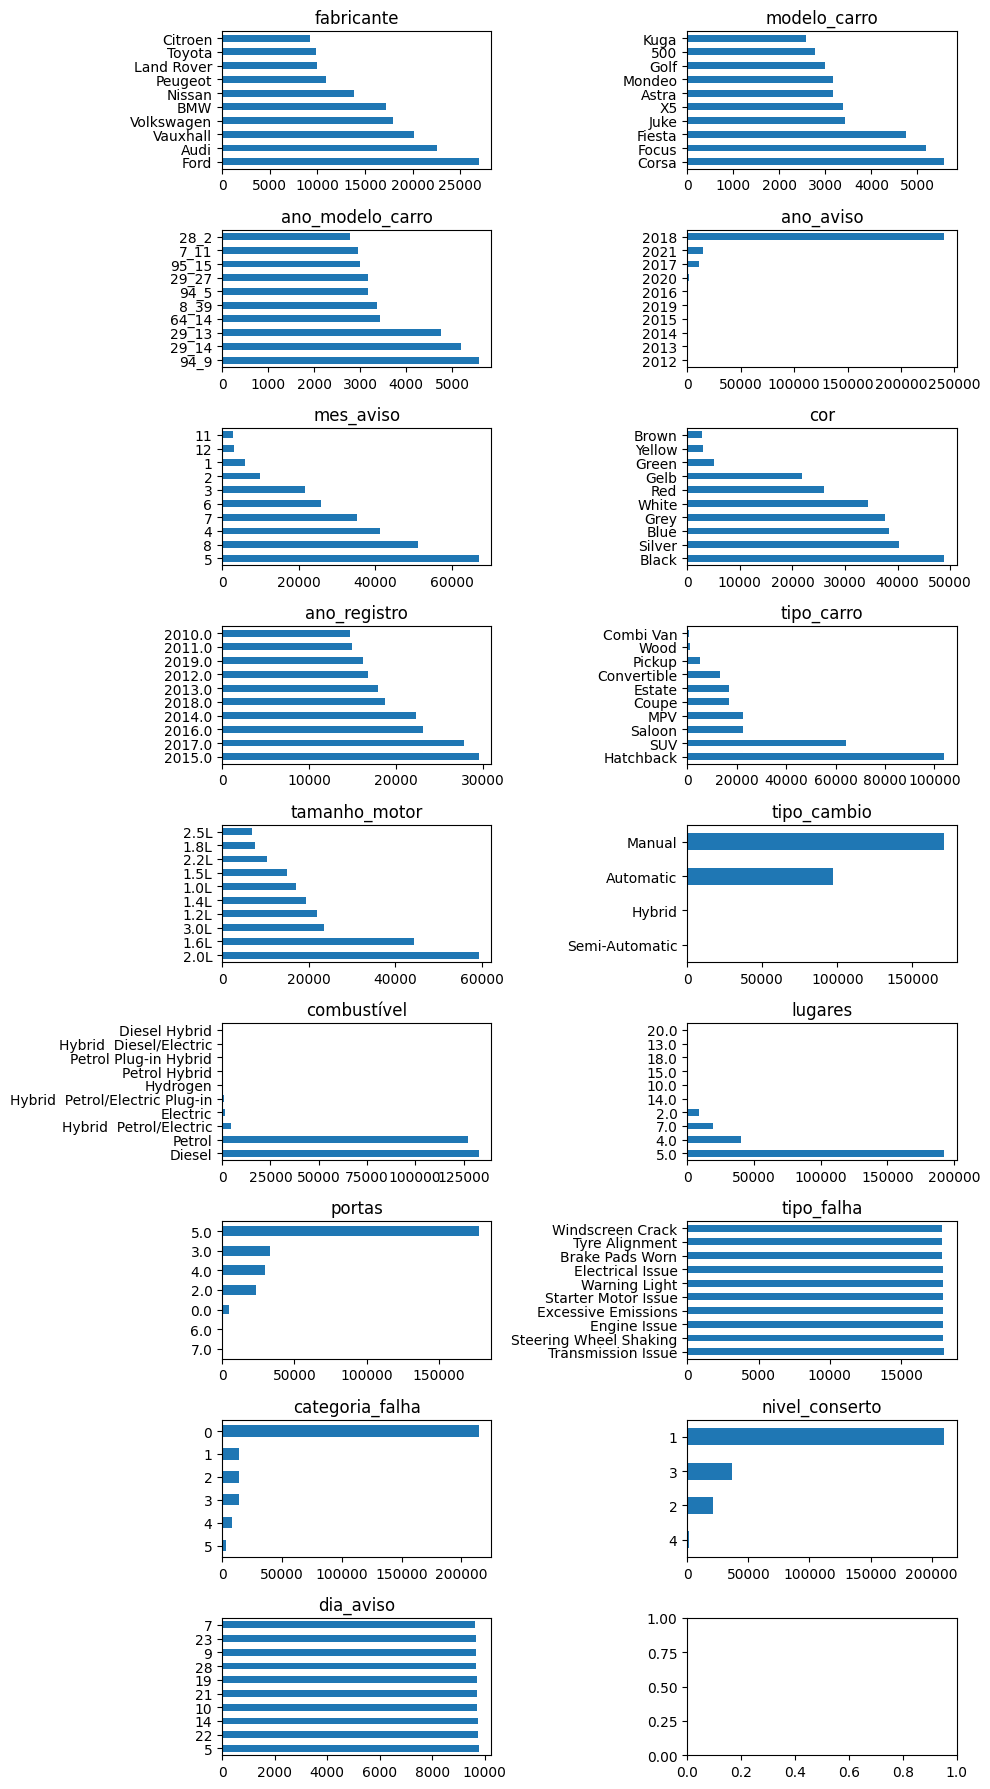

In [206]:
cat_fig(df_unlabeled,cat_columns)
plt.tight_layout()

Feature Engineering

Feature Selection